## <center> EDA for Sentiment </center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
data_df = pd.read_csv('data/rating_auto_label_sentiment_two_classes.csv')
data_df = data_df [['review_text','sentiment']]
data_df = data_df.dropna()

In [3]:
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Text Pre-processing
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'): #ADJECTIVE
        return wordnet.ADJ
    elif nltk_tag.startswith('V'): #VERN
        return wordnet.VERB
    elif nltk_tag.startswith('N'): #NOUN        
        return wordnet.NOUN
    elif nltk_tag.startswith('R'): #ADVERB
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    # Tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) 
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # If no tag was found, then use the word as is
            lemmatized_sentence.append(word)
        else:        
            # Else use the tag to lemmatize the word
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess_text(df):
    df['review_text'] = df['review_text'].astype(str).fillna('')

    # remove white space
    df['review_text'] = df['review_text'].str.strip().str.replace(r'\s+', ' ', regex=True)

    # update to lower case
    df['review_text'] = df['review_text'].str.lower()

    # remove punctuations
    df['review_text'] = df['review_text'].str.replace(r'[{}]'.format(re.escape(string.punctuation)), '', regex=True)

    # remove special characters
    df['review_text'] = df['review_text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

    # remove digits
    df['review_text'] = df['review_text'].str.replace(r'\d+', '', regex=True)

    # remove non ascii
    df['review_text'] = df['review_text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
    
    return df

def remove_stopwords(df):
    stop_words = stopwords.words('english') + ['br']
    stopwords_dict = Counter(stop_words)
    df['review_text'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_dict]))
    return df

def lemmatize(df):
    df['review_text'] = df['review_text'].apply(lambda x: lemmatize_sentence(x))
    return df

In [4]:
# Text Preprocessing
data_df = preprocess_text(data_df)
data_df = remove_stopwords(data_df)
data_df = lemmatize(data_df)

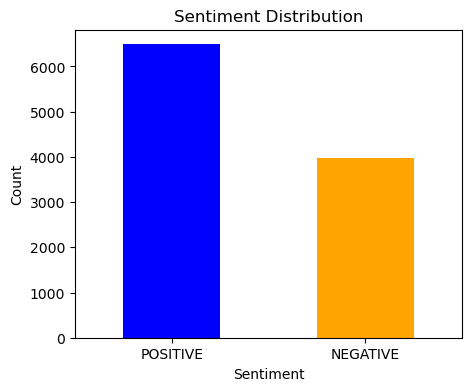

In [5]:
# Show positive & negative sentiment distribution
sentiment_counts = data_df['sentiment'].value_counts()

# Plot the sentiment counts
plt.figure(figsize=(5, 4))
sentiment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

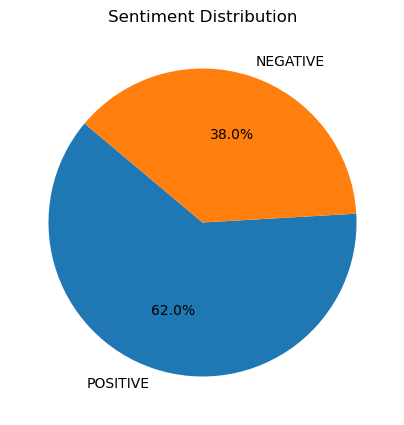

sentiment
POSITIVE    6489
NEGATIVE    3973
Name: count, dtype: int64


In [6]:
# Show positive & negative sentiment distribution
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette())
plt.title('Sentiment Distribution')
plt.show()

# Print the category counts
print(sentiment_counts)

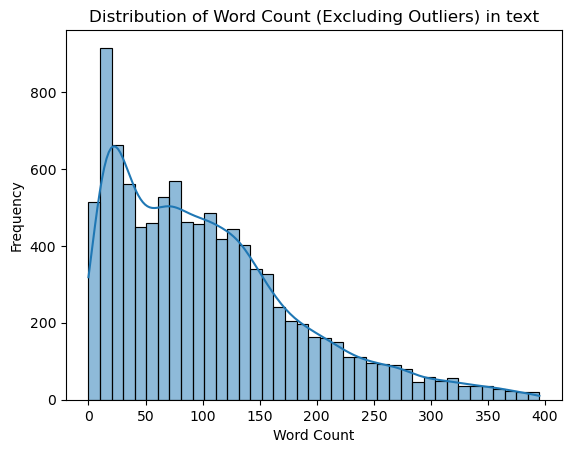

In [7]:
# Assuming you have a DataFrame named df_check with a 'text' column
data_df_copy = data_df 
data_df_copy['word_count'] = data_df_copy['review_text'].apply(lambda x: len(str(x).split()))

# Calculate the IQR (Interquartile Range)
Q1 = data_df_copy['word_count'].quantile(0.0)
Q3 = data_df_copy['word_count'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Create a boolean mask to exclude outliers
outlier_mask = (data_df_copy['word_count'] >= Q1 - threshold * IQR) & (data_df_copy['word_count'] <= Q3 + threshold * IQR)

# Filter the DataFrame to exclude outliers
df_check_no_outliers = data_df_copy[outlier_mask]

# Create the distribution plot without outliers
sns.histplot(data=df_check_no_outliers, x='word_count', kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count (Excluding Outliers) in text')
plt.show()

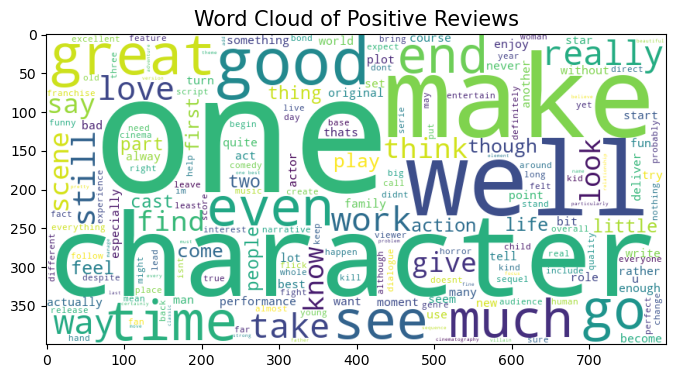

In [8]:
# Frequenty used words in Positive and Negative reviews
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import re

stop_words = set(stopwords.words('english'))
custom_stop_words = ['movie', 'film', 'show', 'story', 'watch', 'director', 'review']
stop_words.update(custom_stop_words)

review_df = data_df[data_df['sentiment'] == 'POSITIVE']

text = " ".join(review for review in review_df.review_text).lower()
text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
text = " ".join(word for word in text.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.title('Word Cloud of Positive Reviews', fontsize=15)
plt.imshow(wordcloud)
plt.show()

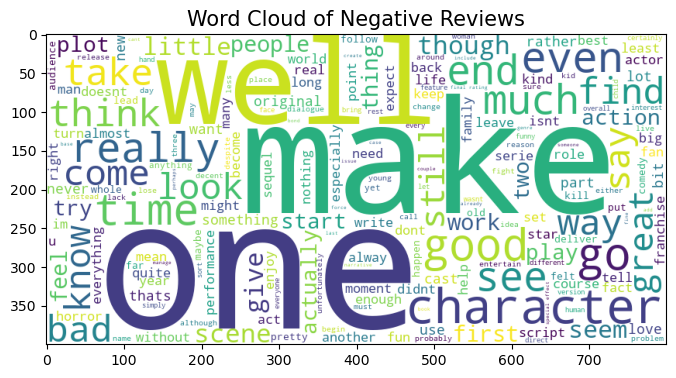

In [9]:
# Frequent used words in Positive and Negative reviews
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import re

stop_words = set(stopwords.words('english'))
custom_stop_words = ['movie', 'film', 'show', 'story', 'watch', 'director', 'review']
stop_words.update(custom_stop_words)

review_df = data_df[data_df['sentiment'] == 'NEGATIVE']

text = " ".join(review for review in review_df.review_text).lower()
text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
text = " ".join(word for word in text.split() if word.lower() not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.title('Word Cloud of Negative Reviews', fontsize=15)
plt.imshow(wordcloud)
plt.show()